# Text Message Analysis

This Project is about a dataset comprising of short messages. It is suppossed to be analysed using all kinds of techniques. Sentiment Analysisi is supposed to be done, thats gonna be fun :)

In [213]:
# Import messages
import pandas as pd
import matplotlib.pyplot as plt
import snakecase
from Preprocessing import preprocess_text

In [214]:
# read dataset into dataframe

df = pd.read_csv("data\clean_nus_sms.csv")

In [215]:
# Display Dataframe: Data Inspection and Central Tendencies

df.head(10)

,Unnamed: 0,id,Message,length,country,Date
0,0,10120,Bugis oso near wat...,21,SG,2003/4
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,4,10124,Meet after lunch la...,22,SG,2003/4
5,5,10125,m walking in citylink now ü faster come down.....,65,SG,2003/4
6,6,10126,5 nights...We nt staying at port step liao...T...,51,SG,2003/4
7,7,10127,Hey pple...$700 or $900 for 5 nights...Excelle...,81,SG,2003/4
8,8,10128,Yun ah.the ubi one say if ü wan call by tomorr...,160,SG,2003/4
9,9,10129,Hey tmr maybe can meet you at yck,33,SG,2003/4


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48598 entries, 0 to 48597
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48598 non-null  int64 
 1   id          48598 non-null  int64 
 2   Message     48595 non-null  object
 3   length      48598 non-null  object
 4   country     48598 non-null  object
 5   Date        48598 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.2+ MB


In [217]:
#Converting datatypes in columns

df.columns = [col.lower() for col in df.columns]

df["message"] = df["message"].astype(str)
df["country"] = df["country"].astype(str)
df["date"] = pd.to_datetime(df["date"], format = "%Y/%m")

In [218]:
df['length'] = df['length'].apply(pd.to_numeric, errors='coerce')
#df["length"] = df["length"].astype(int) wouldnt work because there are wierd entries in this feature like Error messages

In [219]:
df.describe()

,unnamed: 0,id,length,date
count,48598.000000,48598.000000,48594.000000,48598
mean,27138.722355,21106.315342,54.850434,2009-12-05 04:49:04.713774080
min,0.000000,1.000000,1.000000,2003-04-01 00:00:00
25%,12852.250000,12100.000000,21.000000,2011-01-01 00:00:00
50%,26916.500000,18553.000000,39.000000,2011-03-01 00:00:00
75%,40080.500000,29964.500000,70.000000,2011-11-01 00:00:00
max,55834.000000,45718.000000,910.000000,2015-03-01 00:00:00
std,16206.056352,12189.313543,53.203030,NaN


## Exploratory Data Analysis (EDA): <br> 

Involves various techniques to better understand the characteristics of the dataset.

* Message Length vs. Country: Create a box plot or violin plot showing the distribution of message lengths for each country. This can help you identify whether message lengths vary significantly across different countries.

+ Message Length over Time: Plot a line chart showing how the average or median message length changes over time. This can help you identify any trends or patterns in the length of messages being sent.

+ Word Clouds: Generate word clouds for messages in different countries. Word clouds visually represent the most frequent words in a corpus, providing an intuitive way to see the prominent terms used in each country's messages.

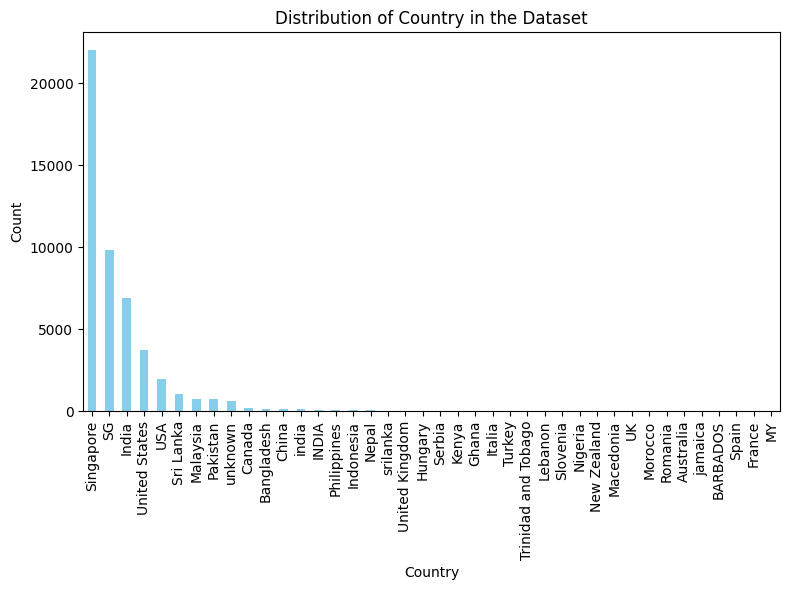

In [220]:
# Distribution of Countries in a Box Plot
country_counts = df['country'].value_counts() 

#Ploting

plt.figure(figsize = (8,6))
country_counts.plot(kind = "bar", color = "skyblue")
plt.title("Distribution of Country in the Dataset")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [221]:
# Normalize country names to lowercase
df['country'] = df['country'].str.lower()

In [222]:
df.head()

,unnamed: 0,id,message,length,country,date
0,0,10120,Bugis oso near wat...,21.0,sg,2003-04-01
1,1,10121,"Go until jurong point, crazy.. Available only ...",111.0,sg,2003-04-01
2,2,10122,I dunno until when... Lets go learn pilates...,46.0,sg,2003-04-01
3,3,10123,Den only weekdays got special price... Haiz......,140.0,sg,2003-04-01
4,4,10124,Meet after lunch la...,22.0,sg,2003-04-01


In [223]:
#Apparently there are some countries with abbreviations like SGthat I want to replace with the full names


# Dictionary to map abbreviations to full names
country_mapping = {
    'uk': 'united kingdom',
    'sg': 'singapore',
    'my': 'malaysia',
    'united states': 'usa'
}

# Replace abbreviations with full names
df['country'] = df['country'].replace(country_mapping) 

In [224]:
#Repeat country counts

country_counts = df['country'].value_counts() 

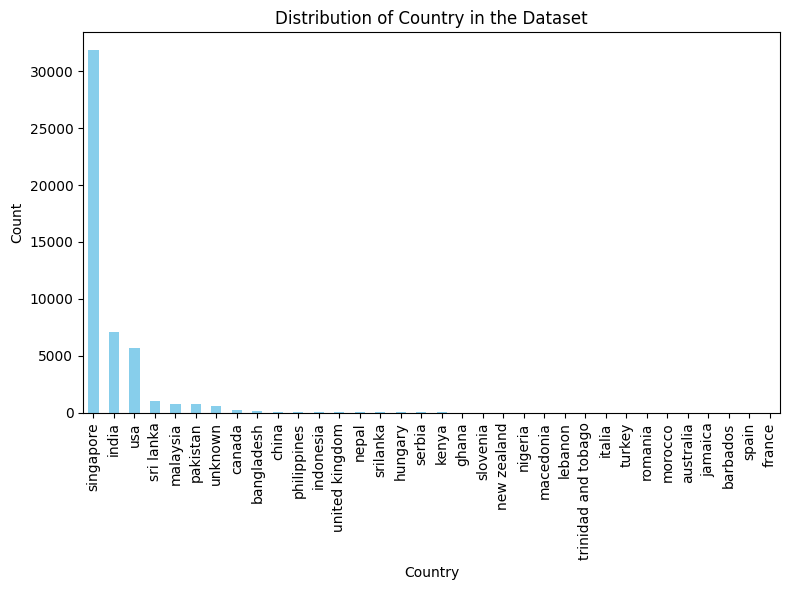

In [225]:
#Ploting again

plt.figure(figsize = (8,6))
country_counts.plot(kind = "bar", color = "skyblue")
plt.title("Distribution of Country in the Dataset")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

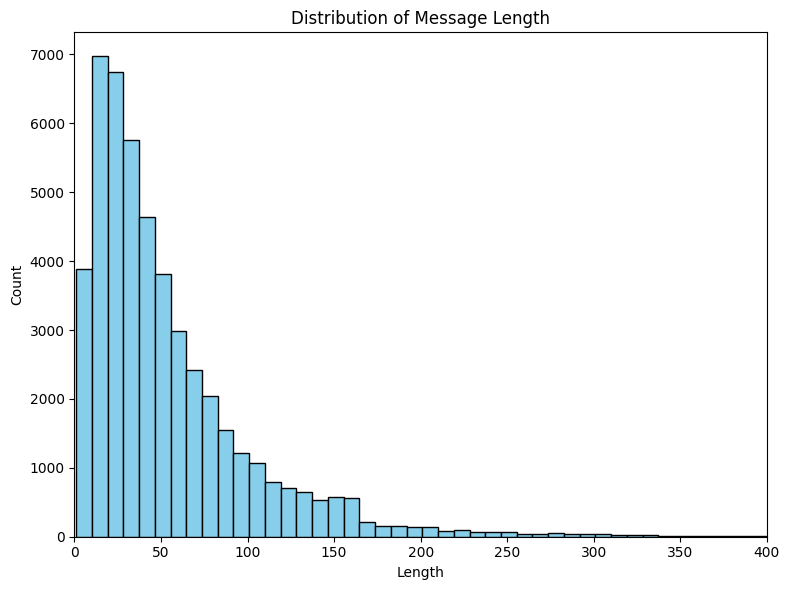

In [226]:
#Message Length Distribution

plt.figure(figsize=(8, 6))
plt.hist(df['length'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Message Length')
plt.xlabel('Length')
plt.ylabel('Count')

# Set x-axis limits
plt.xlim(0, 400)  # Adjust the upper limit (12 in this case)

# Set tick distance on the x-axis
#plt.xticks(range(0, 400, 50))

plt.tight_layout()
plt.show()

So, most messages are between ten and twenty tokens long. The average message has 54 tokens, the median message 39 tokens.

In [227]:
df10 = df[(df['date'] >= '2010-01-01') & (df['date'] <= '2010-12-31')]
df11 = df[(df['date'] >= '2011-01-01') & (df['date'] <= '2011-12-31')]
df12 = df[(df['date'] >= '2012-01-01') & (df['date'] <= '2012-12-31')]
df13 = df[(df['date'] >= '2013-01-01') & (df['date'] <= '2013-12-31')]
df14 = df[(df['date'] >= '2014-01-01') & (df['date'] <= '2014-12-31')]
df15 = df[(df['date'] >= '2015-01-01') & (df['date'] <= '2015-12-31')]

In [228]:
# Group by date and calculate average length
length_by_date10 = df10.groupby('date')['length'].mean()

# Group by date and calculate average length
length_by_date11 = df11.groupby('date')['length'].mean()

# Group by date and calculate average length
length_by_date12 = df12.groupby('date')['length'].mean()

# Group by date and calculate average length
length_by_date13 = df13.groupby('date')['length'].mean()

# Group by date and calculate average length
length_by_date14 = df14.groupby('date')['length'].mean()

# Group by date and calculate average length
length_by_date15 = df15.groupby('date')['length'].mean()


In [229]:
print(length_by_date13)

date
2013-05-01    44.363636
Name: length, dtype: float64


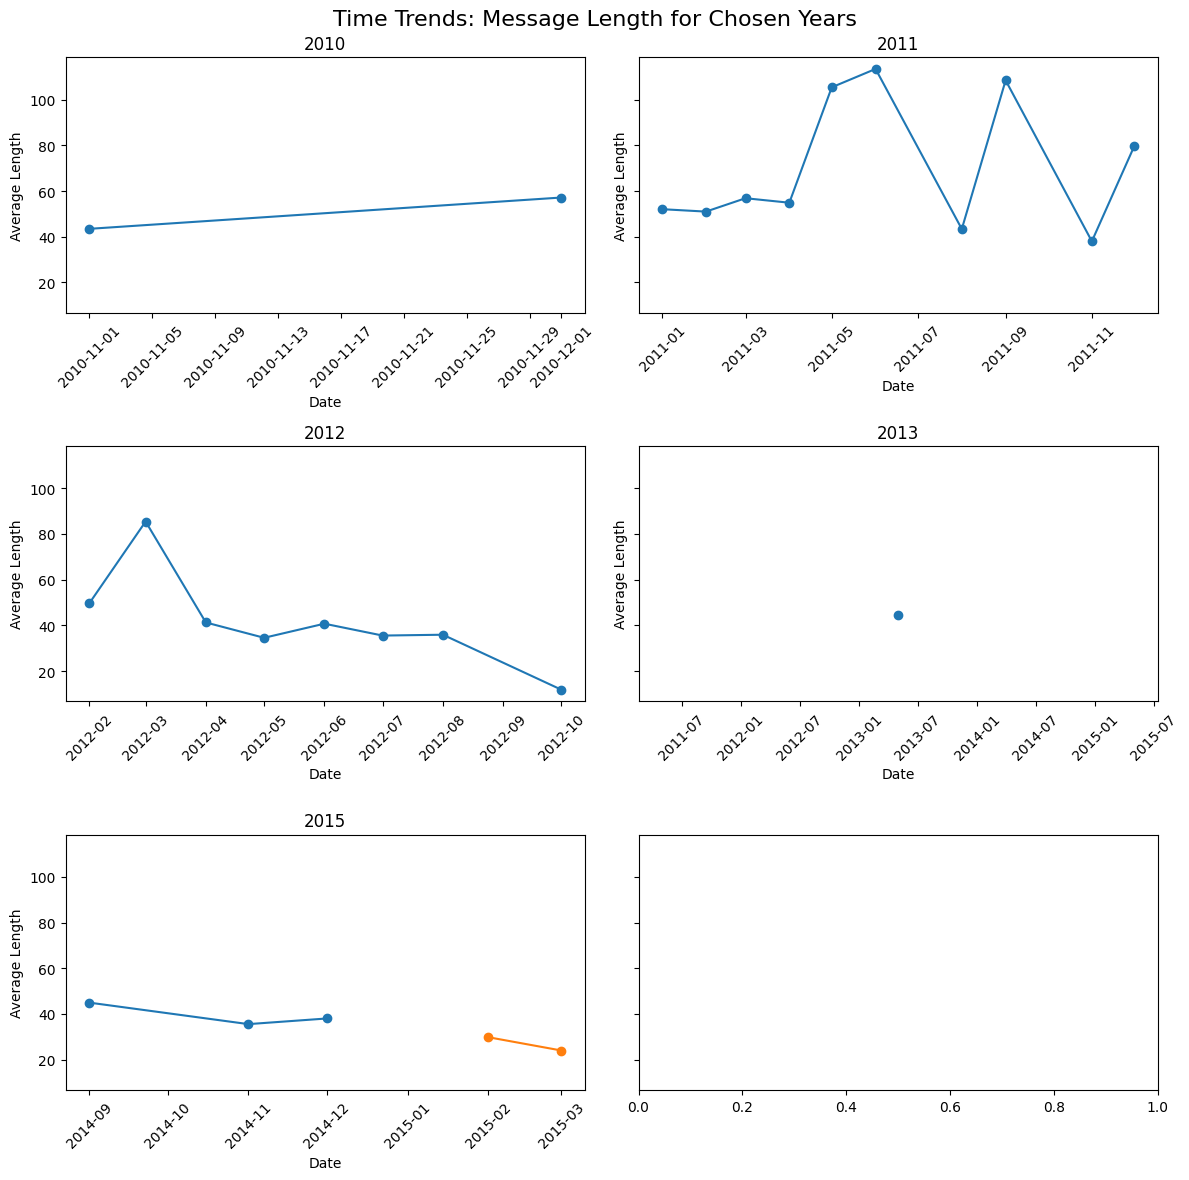

In [230]:

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12), sharey = True)
fig.suptitle('Time Trends: Message Length for Chosen Years', fontsize=16)

# Plot for 2010
axes[0, 0].plot(length_by_date10.index, length_by_date10.values, marker='o')
axes[0, 0].set_title('2010')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Average Length')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot for 2011
axes[0, 1].plot(length_by_date11.index, length_by_date11.values, marker='o')
axes[0, 1].set_title('2011')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Average Length')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot for 2012
axes[1, 0].plot(length_by_date12.index, length_by_date12.values, marker='o')
axes[1, 0].set_title('2012')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Average Length')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot for 2013
axes[1, 1].plot(length_by_date13.index, length_by_date13.values, marker='o')
axes[1, 1].set_title('2013')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Average Length')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot for 2014
axes[2, 0].plot(length_by_date14.index, length_by_date14.values, marker='o')
axes[2, 0].set_title('2014')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Average Length')
axes[2, 0].tick_params(axis='x', rotation=45)

# Plot for 2015
axes[2, 0].plot(length_by_date15.index, length_by_date15.values, marker='o')
axes[2, 0].set_title('2015')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Average Length')
axes[2, 0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Medium Analysis

In this section I want to dive deeper into the dataset and employ more sophisticated analysis like

Word Frequency Analysis: Perform a word frequency analysis to identify the most common words in the messages. This can give you insights into the language used in the dataset.

Sentiment Analysis: Use a sentiment analysis tool or library to analyze the sentiment of the messages. This could help you understand the overall sentiment of the messages in different countries or over time.

Country-specific Analysis: Compare the distribution of message lengths or sentiment scores across different countries to identify any variations in communication style or sentiment.

In [231]:
# Apply preprocessing to "Message" column and create "message_processed" column
df['message_processed'] = df['message'].apply(preprocess_text)

c:\Users\Rene\Documents\Datascience\Codecademy\projects\Portfolio Projects\Text_Message_Analysis\Preprocessing.py:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [232]:
df.head()

,unnamed: 0,id,message,length,country,date,message_processed
0,0,10120,Bugis oso near wat...,21.0,singapore,2003-04-01,"[bugis, oso, near, wat]"
1,1,10121,"Go until jurong point, crazy.. Available only ...",111.0,singapore,2003-04-01,"[go, jurong, point, crazy, available, bugis, n..."
2,2,10122,I dunno until when... Lets go learn pilates...,46.0,singapore,2003-04-01,"[dunno, let, go, learn, pilate]"
3,3,10123,Den only weekdays got special price... Haiz......,140.0,singapore,2003-04-01,"[den, weekday, got, special, price, haiz, cant..."
4,4,10124,Meet after lunch la...,22.0,singapore,2003-04-01,"[meet, lunch, la]"


# Sentiment Analysis

In [233]:
from textblob import TextBlob

# Apply sentiment analysis to the original "Message" column
df['sentiment_original'] = df['message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Apply sentiment analysis to the preprocessed "message_processed" column
df['sentiment_processed'] = df['message_processed'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)


In [234]:
# Display the DataFrame with sentiment analysis results
df.head(10)

,unnamed: 0,id,message,length,country,date,message_processed,sentiment_original,sentiment_processed
0,0,10120,Bugis oso near wat...,21.0,singapore,2003-04-01,"[bugis, oso, near, wat]",0.100000,0.100000
1,1,10121,"Go until jurong point, crazy.. Available only ...",111.0,singapore,2003-04-01,"[go, jurong, point, crazy, available, bugis, n...",0.150000,0.200000
2,2,10122,I dunno until when... Lets go learn pilates...,46.0,singapore,2003-04-01,"[dunno, let, go, learn, pilate]",0.000000,0.000000
3,3,10123,Den only weekdays got special price... Haiz......,140.0,singapore,2003-04-01,"[den, weekday, got, special, price, haiz, cant...",0.178571,0.357143
4,4,10124,Meet after lunch la...,22.0,singapore,2003-04-01,"[meet, lunch, la]",0.000000,0.000000
5,5,10125,m walking in citylink now ü faster come down.....,65.0,singapore,2003-04-01,"[walking, citylink, faster, come, hungry]",0.022222,0.000000
6,6,10126,5 nights...We nt staying at port step liao...T...,51.0,singapore,2003-04-01,"[nightswe, nt, staying, port, step, liaotoo, ex]",0.000000,0.000000
7,7,10127,Hey pple...$700 or $900 for 5 nights...Excelle...,81.0,singapore,2003-04-01,"[hey, pple, nightsexcellent, location, wif, br...",0.000000,0.000000
8,8,10128,Yun ah.the ubi one say if ü wan call by tomorr...,160.0,singapore,2003-04-01,"[yun, ahthe, ubi, one, say, wan, call, tomorro...",-0.100000,-0.200000
9,9,10129,Hey tmr maybe can meet you at yck,33.0,singapore,2003-04-01,"[hey, tmr, maybe, meet, yck]",0.000000,0.000000


In [235]:
# Calculate average sentiment of original messages
average_sentiment_original = df['sentiment_original'].mean()
print(average_sentiment_original)


0.12227756121872416


The sentiment value is typically in the range of -1 to +1, where -1 represents a highly negative sentiment, +1 represents a highly positive sentiment, and 0 represents a neutral sentiment. The mean sentiment value calculated for 

this dataset of 0.122 is to be interpreted as predominantly neutral with a mild shift towards positive sentiment.

In [236]:
# Calculate average sentiment of processsed messages
average_sentiment_processed = df['sentiment_processed'].mean()
print(average_sentiment_processed)

0.10393517839579422


To illustrate the effect of text preprocessing, the average sentiment values of original, and processed text data was calculated. The average sentiment for processed text data came out to be 0.104, and therefor very similar in polarity 

and magnitude to the original sentiment value. This illustrates that removing punctualtion for sentiment analysis amplifies the trend toward a neutral sentiment. 

In [237]:
# Calculate relative difference
df['relative_difference'] = (df['sentiment_original'] - df['sentiment_processed']).abs()

# Calculate average relative difference
average_relative_difference = df['relative_difference'].mean()

print(average_relative_difference)

0.05071168801392786


Message Sentiment by country

In [238]:
# Group by country and calculate average sentiment
average_sentiment_by_country = df.groupby('country')['sentiment_processed'].mean()

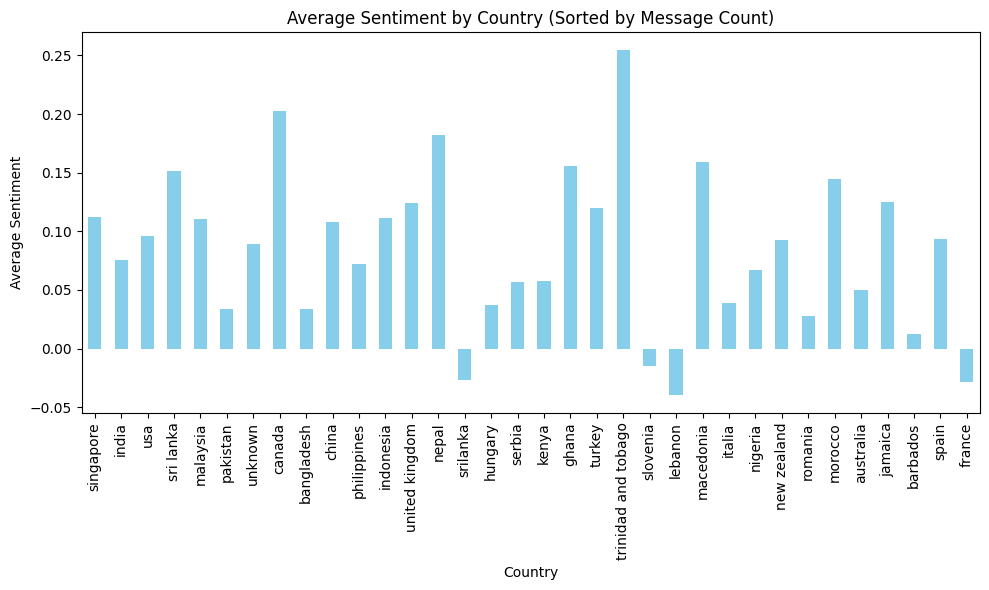

In [239]:
# Group by country and calculate the number of messages and average sentiment
country_grouped = df.groupby('country').agg({'message': 'count', 'sentiment_processed': 'mean'})
country_grouped = country_grouped.rename(columns={'message': 'message_count'})

# Sort by highest number of messages
country_grouped = country_grouped.sort_values(by='message_count', ascending=False)

# Plot average sentiment by country
plt.figure(figsize=(10, 6))
country_grouped['sentiment_processed'].plot(kind='bar', color='skyblue')
plt.title('Average Sentiment by Country (Sorted by Message Count)')
plt.xlabel('Country')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Interpretation: the average sentiment for all messages is 0.104. Countries that are close to this value are Singapore, the USA and Malaysia. Taken into account that Singapore is majorly overrepresented in this dataset(30k out of 50k messages), this makes sense. Messages from India or Pakistan seem to have a lower sentiment score while messages from Canada and Trinidad and Tobago have and quite high sentiment score. The reason for that is speculative. Maybe its cultural reason that these countries use less emojis and punctuation to express sentiment. I will test this hypothesis by comparing the sentiment differences between processed text messages and not processed text messages. If I can map the country differences to the difference in processed text messages this would endorse the hypothesis

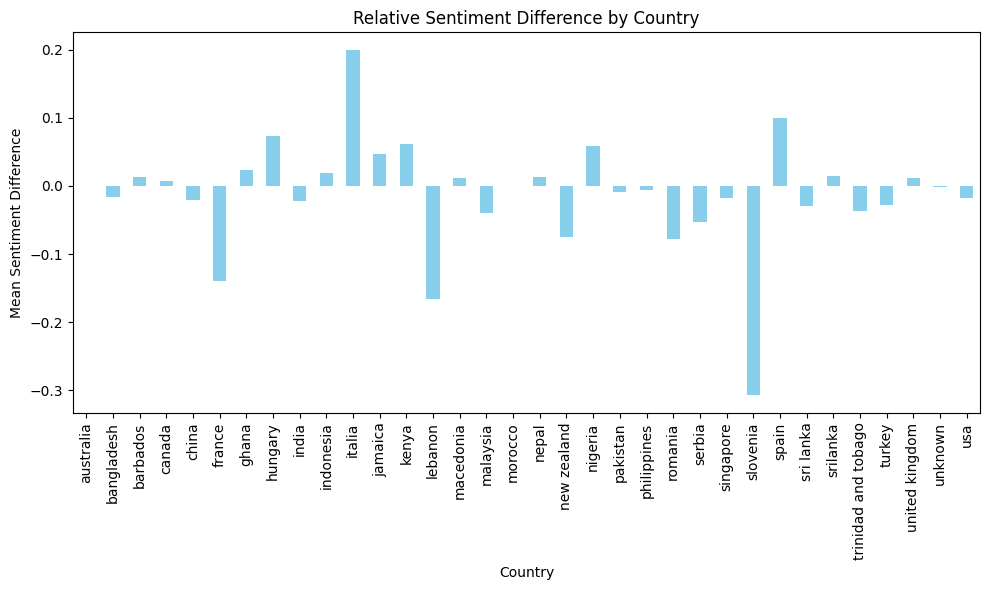

In [240]:
# Calculate relative difference in sentiment scores
df['sentiment_difference'] = df['sentiment_processed'] - df['sentiment_original']

# Group by country and calculate mean sentiment difference
mean_difference_by_country = df.groupby('country')['sentiment_difference'].mean()

# Plot relative sentiment difference by country
plt.figure(figsize=(10, 6))
mean_difference_by_country.plot(kind='bar', color='skyblue')
plt.title('Relative Sentiment Difference by Country')
plt.xlabel('Country')
plt.ylabel('Mean Sentiment Difference')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Interpretation: The diffence in sentiment between processed messages and original text may represent a cultural disposition to change the meaning of words by punctuation and emojis. Countries that display a high diffence are france, Italy, Lebanon, New Zealand, Slovenia or Spain. Countries that exhibit a small diffence are Australia, Canada, Morocco, Phillipines, Pakistan, India, Sri Lanka, USA, or Nepal. The texting culture in these countries seem not to change the meaning of words by punctuation. This could be due to a diffence in usage of text messages. This difference in usage could be further explored by looking into the topics of text messages. 
The difference in processed text to unprocessed text was not low in the countries that diverged most from the mean sentiment. The hypothesis made earlier that the deviate from the mean may be explained by punctuation and emoji usage in these countries can therefore be rejected. A topic analysis could therefor help to understand this difference.
Another interesting feature of this analysis is the polarity of the difference. The sentiment diffence can be positive or negative. A negative value emerges when the sentiment of the processed message is lower than that of the original message. It represents a loss in sentiment score when punctuation is removed. Vice versa a positive value emerges when the processed text has a lower sentiment score than the original text message. This represents a gain in sentiment when punctuation is out of the picture.  There are 6 reasons why text preprocessing could influence sentiment scores: 

1. Noise Removal: Preprocessing often involves removing special characters, punctuation, and other noise from text. Depending on the context, some punctuation or characters might contribute to the emotional tone of the message. Removing them could alter the sentiment interpretation.

2. Emojis and Symbols: Emojis and symbols are often used to convey emotions and sentiment. Some sentiment analysis algorithms may assign specific sentiment scores to emojis. If emojis are removed during preprocessing, the sentiment analysis may lose information about emotional cues.

3. Stemming and Lemmatization: Stemming and lemmatization reduce words to their root forms. This could impact sentiment analysis if certain forms of words carry strong sentiment, and the root form doesn't capture that sentiment as accurately.

4. Negation Handling: Some sentiment analysis methods take negations into account. Preprocessing might alter the structure of negations, leading to changes in the sentiment interpretation.

5. Language and Culture: Sentiment analysis models are often trained on specific languages and cultures. Preprocessing could inadvertently modify text in ways that make it less recognizable to the model, leading to changes in sentiment interpretation.

6. Context and Nuance: Sentiment analysis relies on context and understanding the nuances of language. Preprocessing might inadvertently remove context or alter the way certain phrases or expressions are understood, affecting sentiment interpretation. 

C:\Users\Rene\AppData\Local\Temp\ipykernel_24220\3743724422.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


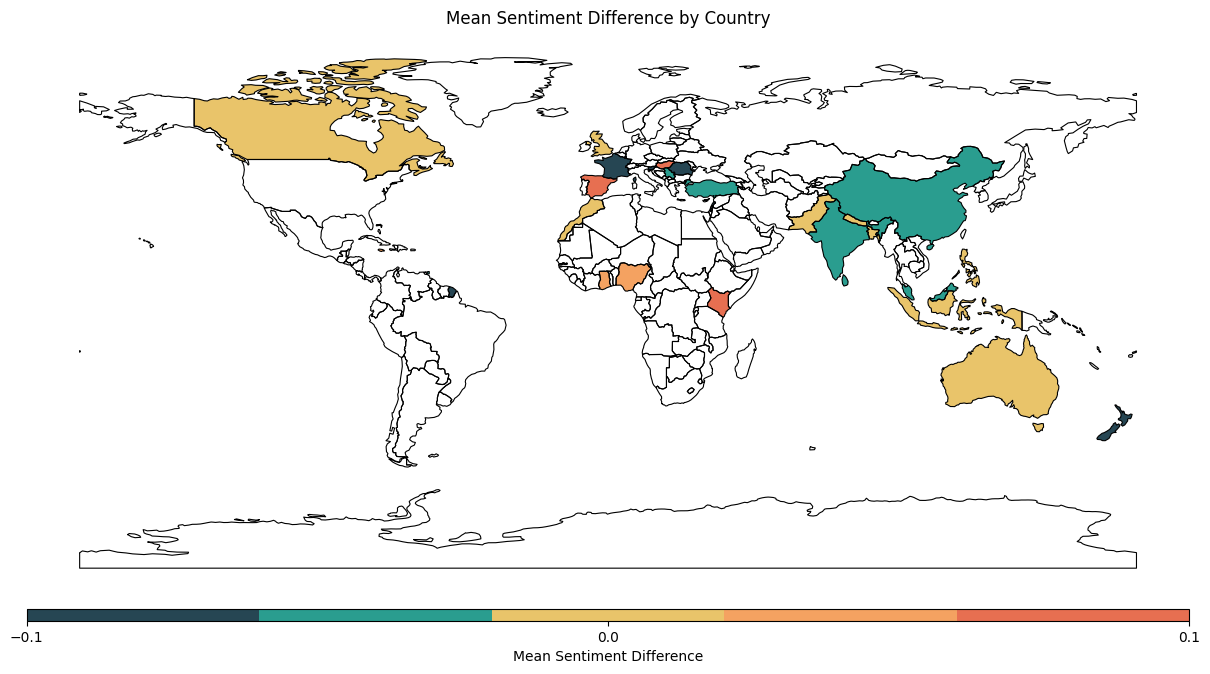

In [241]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Group by country and calculate mean sentiment difference
mean_difference_by_country = df.groupby('country')['sentiment_difference'].mean().reset_index()

# Load world shapefile (use a more comprehensive world shapefile)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge shapefile with mean sentiment difference data using case-insensitive comparison
world['country_upper'] = world['name'].str.upper()
mean_difference_by_country['country_upper'] = mean_difference_by_country['country'].str.upper()
world = world.merge(mean_difference_by_country, left_on='country_upper', right_on='country_upper', how='left')

# Create a custom colormap without white
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
cmap = ListedColormap(colors)

# Set custom intensity thresholds
vmin = -0.1
vmax = 0.1

# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.8, color='black')  # Display country boundaries

# Create a Normalize object for custom scaling
norm = Normalize(vmin=vmin, vmax=vmax)

# Plot countries with custom colormap
world.plot(column='sentiment_difference', cmap=cmap, norm=norm, ax=ax, legend=False)

# Create color scale legend
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02, aspect=100)  # Adjust the aspect for width
cbar.set_ticks([vmin, 0.0, vmax])  # Adjust the ticks as needed
cbar.set_label('Mean Sentiment Difference')

ax.set_title('Mean Sentiment Difference by Country')
ax.axis('off')

plt.show()


These maps are not as informative as I thought but I wanted to play around with them anyway. One thing that does strike though is the difference between australia and new zealand, two countries with the same language and (trigger warning for aussies and sheep shaggers!) hardly  distinguishable culture.
But enough of that, lets look into the topics.

# Most common Topics using TF_IDF

In [242]:
df.head()

,unnamed: 0,id,message,length,country,date,message_processed,sentiment_original,sentiment_processed,relative_difference,sentiment_difference
0,0,10120,Bugis oso near wat...,21.0,singapore,2003-04-01,"[bugis, oso, near, wat]",0.100000,0.100000,0.000000,0.000000
1,1,10121,"Go until jurong point, crazy.. Available only ...",111.0,singapore,2003-04-01,"[go, jurong, point, crazy, available, bugis, n...",0.150000,0.200000,0.050000,0.050000
2,2,10122,I dunno until when... Lets go learn pilates...,46.0,singapore,2003-04-01,"[dunno, let, go, learn, pilate]",0.000000,0.000000,0.000000,0.000000
3,3,10123,Den only weekdays got special price... Haiz......,140.0,singapore,2003-04-01,"[den, weekday, got, special, price, haiz, cant...",0.178571,0.357143,0.178571,0.178571
4,4,10124,Meet after lunch la...,22.0,singapore,2003-04-01,"[meet, lunch, la]",0.000000,0.000000,0.000000,0.000000


In [243]:
# import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Filter out rows with messages containing less than 3 words
min_words_threshold = 3  # Set the minimum number of words for a message
df2 = df[df['message_processed'].apply(lambda words: len(words) >= min_words_threshold)].copy()

# Convert lists of strings to space-separated strings
df2['message_processed'] = df2['message_processed'].apply(' '.join)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed messages using TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df2['message_processed'])

# Get the TF-IDF features (words)
tfidf_features = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame for easier interpretation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

# Add a new column with the most important word for each document
most_important_words = tfidf_df.idxmax(axis=1)  # Get the word with the highest TF-IDF score
df2['most_important_word'] = most_important_words

In [245]:
df2.head()

,unnamed: 0,id,message,length,country,date,message_processed,sentiment_original,sentiment_processed,relative_difference,sentiment_difference,most_important_word
0,0,10120,Bugis oso near wat...,21.0,singapore,2003-04-01,bugis oso near wat,0.100000,0.100000,0.000000,0.000000,bugis
1,1,10121,"Go until jurong point, crazy.. Available only ...",111.0,singapore,2003-04-01,go jurong point crazy available bugis n great ...,0.150000,0.200000,0.050000,0.050000,amore
2,2,10122,I dunno until when... Lets go learn pilates...,46.0,singapore,2003-04-01,dunno let go learn pilate,0.000000,0.000000,0.000000,0.000000,pilate
3,3,10123,Den only weekdays got special price... Haiz......,140.0,singapore,2003-04-01,den weekday got special price haiz cant eat li...,0.178571,0.357143,0.178571,0.178571,muz
4,4,10124,Meet after lunch la...,22.0,singapore,2003-04-01,meet lunch la,0.000000,0.000000,0.000000,0.000000,lunch


In [260]:
# Display the word cloud using Matplotlib

from wordcloud import WordCloud, STOPWORDS


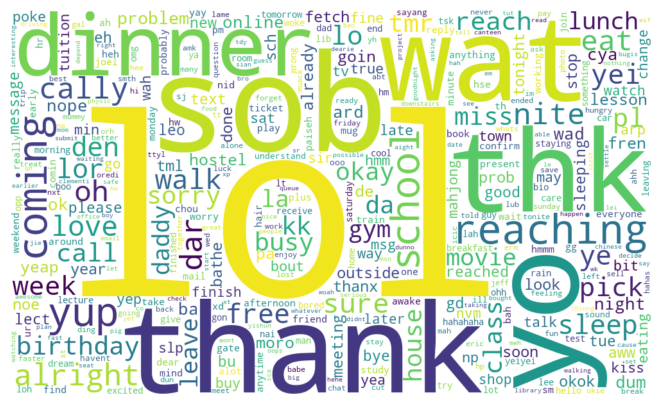

In [267]:
# Convert values to strings and combine the words into a single string
wordcloud_text = ' '.join(map(str, df2['most_important_word']))

#stopwords handling

stopwords = STOPWORDS

# Generate a word cloud from the most important words
wordcloud = WordCloud(width=1000, height=600, background_color='white', stopwords = set(list(stopwords)+["nan", "ha", "haha", "hahaha"]), max_words = 400).generate(wordcloud_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [259]:
# Count the number of NaN values in the 'most_important_word' column
nan_count = df2['most_important_word'].isnull().sum()

# Print the number of NaN values
print("Number of NaN values:", nan_count)

Number of NaN values: 8010


# Advanced Analysis: <br>
Topic Modeliling techniques (such as Latent Dirichlet Allocation or Non-Negative Matrix Factorization) are used to uncover underlying topics in the messages. This can help you categorize messages based on their content.

Alternatively, Named Entity Recognition (NER) are implemented to extract entities like names, dates, locations, etc., from the messages. This can provide insights into the main subjects or events mentioned in the dataset.
